In [33]:
import seaborn as sns
sns.set_style("white")

%pylab inline
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D

from nengolib.stats import sphere, ball

n_samples = 100000
rng = np.random.RandomState(1)
p = sphere.sample(n_samples, 3, rng=rng)
b = ball.sample(1000, 3, rng)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


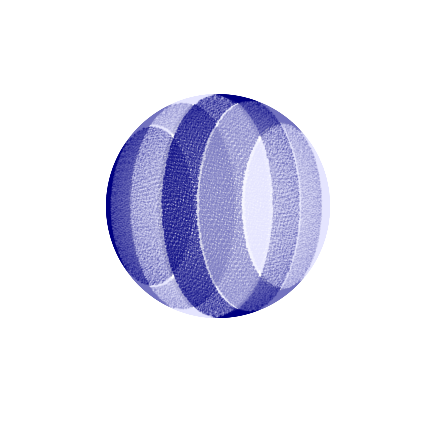

In [44]:
pal = np.asarray(sns.light_palette("navy", 3)) #cubehelix_palette(4))
colors = (np.dot(p, [0, -1, 0])*len(pal))%len(pal)
s = np.ones(n_samples)*3  # (np.dot(p, [0, 0, -1])+1)*3/2.0
borders = abs(np.dot(p, [0, 1, 0])) % (1.0/len(pal)) < 0.02
#borders[(np.dot(p, sphere.sample(20, 3).T) > 0.99).any(axis=1)] = True
s[borders] = 0
#s[abs(np.dot(p, [0, 0, 1])) < 0.02] = 0
#s[np.dot(p, [0, 1, 0])%0.3 < 0.01] = 0
#s[abs(np.dot(p, [0, 1, 0]))%0.2 < 0.01] = 0

fig = pylab.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off() 

ax.scatter(*p.T, alpha=0.6, s=s, lw=0, c=pal[np.asarray(colors, dtype=int)])
#ax.scatter(*p[borders].T, s=3, lw=0, c='black')
#ax.scatter(*b.T, alpha=0.3, s=5, lw=0)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(elev=0, azim=30)

fig.tight_layout()
pylab.show()

fig.savefig('_sphere.png', bbox_inches='tight', pad_inches=-1.1, dpi=300)

In [41]:
print (np.dot(p, sphere.sample(20, 3).T) > 0.9).any(axis=1).shape

(100000L,)
